In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv(r"C:\Users\dhruv\OneDrive\Desktop\Telecom Churn Project\Churn_Dateset.csv")

In [3]:
df

,Anonymous Customer ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn,Customer Value
0,1.0,8.0,0.0,38.0,0.0,4370.0,71.0,5.0,17.0,3.0,1.0,1.0,0.0,132.60
1,2.0,0.0,0.0,39.0,0.0,318.0,5.0,7.0,4.0,2.0,1.0,2.0,0.0,17.46
2,3.0,10.0,0.0,37.0,0.0,2453.0,60.0,359.0,24.0,3.0,1.0,1.0,0.0,181.29
3,4.0,10.0,0.0,38.0,0.0,4198.0,66.0,1.0,35.0,1.0,1.0,1.0,0.0,252.48
4,5.0,3.0,0.0,38.0,0.0,2393.0,58.0,2.0,33.0,1.0,1.0,1.0,0.0,144.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=df.dropna()

In [5]:
df.shape

(3150, 14)

In [6]:
df.dtypes

Anonymous Customer ID      float64
Call  Failure              float64
Complains                  float64
Subscription  Length       float64
Charge  Amount             float64
Seconds of Use             float64
Frequency of use           float64
Frequency of SMS           float64
Distinct Called Numbers    float64
Age Group                  float64
Tariff Plan                float64
Status                     float64
Churn                      float64
Customer Value             float64
dtype: object

In [7]:
df['Status'].value_counts()

1.0    2368
2.0     782
Name: Status, dtype: int64

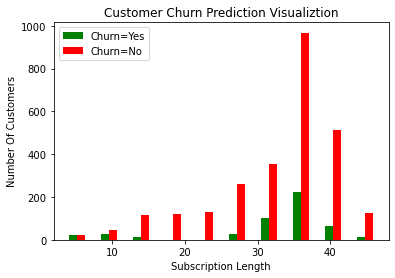

In [8]:
subs_churn_no = df[df.Churn==0]["Subscription  Length"]
subs_churn_yes = df[df.Churn==1]["Subscription  Length"]

plt.xlabel("Subscription Length")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([subs_churn_yes, subs_churn_no], rwidth=0.5, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

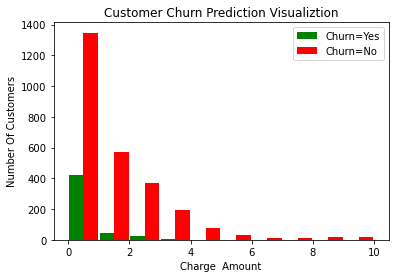

In [9]:
charge_churn_no = df[df.Churn==0]["Charge  Amount"]
charge_churn_yes = df[df.Churn==1]["Charge  Amount"]

plt.xlabel("Charge  Amount")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([charge_churn_yes, charge_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

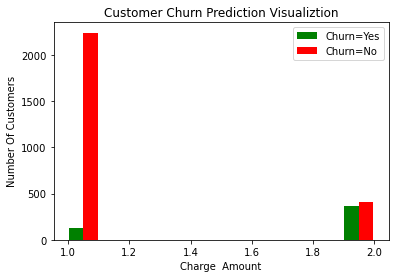

In [10]:
status_churn_no = df[df.Churn==0]["Status"]
status_churn_yes = df[df.Churn==1]["Status"]

plt.xlabel("Charge  Amount")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([status_churn_yes, status_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [11]:
df.describe()

,Anonymous Customer ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn,Customer Value
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,0.157143,170.950251
std,909.471,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,0.363993,172.626850
min,1.000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,788.250,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,0.000000,47.032500
50%,1575.500,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,0.000000,120.675000
75%,2362.750,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,0.000000,241.732500
max,3150.000,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,1.000000,817.650000


In [12]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

Anonymous Customer ID: [1.000e+00 2.000e+00 3.000e+00 ... 3.148e+03 3.149e+03 3.150e+03]
Call  Failure: [ 8.  0. 10.  3. 11.  4. 13.  7.  6.  9. 25.  2. 23. 21.  1. 16. 12. 14.
 28.  5. 26. 24. 19. 15. 22. 20. 18. 17. 30. 27. 29. 31. 33. 35. 32. 34.
 36.]
Complains: [0. 1.]
Subscription  Length: [38. 39. 37. 33. 36. 34. 35. 31. 27. 26. 25. 18. 17. 15. 16.  9. 40. 41.
 29. 28. 20. 19. 11. 32. 24. 23. 13. 14.  7. 42. 43. 30. 22. 21. 12.  5.
 44. 45. 10.  3.  6.  8.  4. 46. 47.]
Charge  Amount: [ 0.  1.  2.  3.  8.  4.  9.  7.  5. 10.  6.]
Seconds of Use: [4370.  318. 2453. ... 8527. 2447. 1082.]
Frequency of use: [ 71.   5.  60.  66.  58.  82.  39. 121. 169.  83.  95.  54. 225.  27.
 182.  86.  14.   0. 127. 154.  75.  47.  93.  98.  22.  41.  44.   2.
  25.  97.   7.   4. 238. 116.  53.  36.  10.  32.  61.  26. 141. 171.
  45.  40.  19.  74.   8.  63.  69.  85.  42. 124. 172.  57. 228.  30.
 185.  89.  17.   3. 130. 157.  78.  50.  96. 101.  28. 100. 241. 119.
  56.  13.  35.  64.  29. 

In [13]:
df['Status'].replace({2:0},inplace=True)
df['Tariff Plan'].replace({2:0},inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_7356\645003486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'].replace({2:0},inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_7356\645003486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tariff Plan'].replace({2:0},inplace=True)


In [14]:
cols_to_scale = ['Call  Failure','Subscription  Length','Charge  Amount','Seconds of Use', 'Frequency of use', 'Frequency of SMS' ,'Distinct Called Numbers', 'Age Group', 'Customer Value']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

C:\Users\dhruv\AppData\Local\Temp\ipykernel_7356\443313989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [15]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Anonymous Customer ID: [1.000e+00 2.000e+00 3.000e+00 ... 3.148e+03 3.149e+03 3.150e+03]
Call  Failure: [0.22222222 0.         0.27777778 0.08333333 0.30555556 0.11111111
 0.36111111 0.19444444 0.16666667 0.25       0.69444444 0.05555556
 0.63888889 0.58333333 0.02777778 0.44444444 0.33333333 0.38888889
 0.77777778 0.13888889 0.72222222 0.66666667 0.52777778 0.41666667
 0.61111111 0.55555556 0.5        0.47222222 0.83333333 0.75
 0.80555556 0.86111111 0.91666667 0.97222222 0.88888889 0.94444444
 1.        ]
Complains: [0. 1.]
Subscription  Length: [0.79545455 0.81818182 0.77272727 0.68181818 0.75       0.70454545
 0.72727273 0.63636364 0.54545455 0.52272727 0.5        0.34090909
 0.31818182 0.27272727 0.29545455 0.13636364 0.84090909 0.86363636
 0.59090909 0.56818182 0.38636364 0.36363636 0.18181818 0.65909091
 0.47727273 0.45454545 0.22727273 0.25       0.09090909 0.88636364
 0.90909091 0.61363636 0.43181818 0.40909091 0.20454545 0.04545455
 0.93181818 0.95454545 0.15909091 0.        

In [16]:
df=df.drop(['Anonymous Customer ID'], axis=1)

In [17]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Churn,Customer Value
0,0.222222,0.0,0.795455,0.0,0.255705,0.278431,0.009579,0.175258,0.50,1.0,1.0,0.0,0.162172
1,0.000000,0.0,0.818182,0.0,0.018607,0.019608,0.013410,0.041237,0.25,1.0,0.0,0.0,0.021354
2,0.277778,0.0,0.772727,0.0,0.143534,0.235294,0.687739,0.247423,0.50,1.0,1.0,0.0,0.221721
3,0.277778,0.0,0.795455,0.0,0.245641,0.258824,0.001916,0.360825,0.00,1.0,1.0,0.0,0.308787
4,0.083333,0.0,0.795455,0.0,0.140023,0.227451,0.003831,0.340206,0.00,1.0,1.0,0.0,0.177068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.583333,0.0,0.363636,0.2,0.391867,0.576471,0.176245,0.453608,0.25,0.0,1.0,0.0,0.419207
3146,0.472222,0.0,0.318182,0.1,0.540492,0.694118,0.153257,0.432990,1.00,1.0,1.0,0.0,0.061377
3147,0.361111,0.0,0.340909,0.4,0.184728,0.200000,0.072797,0.216495,0.50,1.0,1.0,0.0,0.129774
3148,0.194444,0.0,0.181818,0.2,0.274722,0.180392,0.425287,0.123711,0.50,1.0,1.0,0.0,0.253715


In [18]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [19]:
X_train.shape

(2520, 12)

In [20]:
X_test.shape

(630, 12)

In [21]:
X_train[:10]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value
2481,0.194444,0.0,0.863636,0.0,0.065126,0.082353,0.051724,0.113402,0.75,1.0,0.0,0.025371
2738,0.250000,0.0,0.568182,0.1,0.088063,0.141176,0.321839,0.092784,0.25,0.0,1.0,0.175289
1332,0.000000,0.0,0.840909,0.1,0.017145,0.031373,0.022989,0.061856,1.00,1.0,1.0,0.002526
2189,0.333333,0.0,0.613636,0.2,0.113107,0.188235,0.080460,0.742268,1.00,1.0,1.0,0.014389
2562,0.944444,1.0,0.840909,0.6,0.938853,0.945098,0.157088,0.505155,0.50,0.0,1.0,0.618786
262,0.833333,0.0,0.931818,0.4,0.901112,0.921569,0.132184,0.391753,0.50,1.0,1.0,0.590350
1772,0.444444,1.0,0.636364,0.0,0.026916,0.156863,0.000000,0.123711,0.25,1.0,0.0,0.025316
1938,0.138889,0.0,0.522727,0.1,0.100644,0.160784,0.371648,0.092784,0.25,0.0,1.0,0.201431
2530,0.166667,0.0,0.659091,0.2,0.404330,0.372549,0.019157,0.195876,1.00,1.0,1.0,0.042867
3082,0.138889,0.0,0.795455,0.2,0.037624,0.039216,0.021073,0.041237,1.00,1.0,1.0,0.004605


In [22]:
len(X_train.columns)

12

In [24]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.8202
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.8687
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 0.8865
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.8956
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.9004
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.9000
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2320 - accuracy: 0.9028
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2299 - accuracy: 0.9024
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2281 - accuracy: 0.9028
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9016
Epoch 11/

In [25]:
model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 1ms/step - loss: 0.1334 - accuracy: 0.9413


[0.13343384861946106, 0.9412698149681091]

In [26]:
yp = model.predict(X_test)
yp[:5]

20/20 [==============================] - 0s 2ms/step


array([[2.6060763e-01],
       [4.9408473e-02],
       [2.1407050e-11],
       [3.3678532e-02],
       [6.2532634e-01]], dtype=float32)

In [27]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [28]:
y_pred[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [29]:
y_test[:10]

2951    0.0
2991    0.0
2952    0.0
1641    0.0
2251    0.0
1556    0.0
2517    0.0
2135    0.0
2821    0.0
1753    0.0
Name: Churn, dtype: float64

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       531
         1.0       0.82      0.81      0.81        99

    accuracy                           0.94       630
   macro avg       0.89      0.89      0.89       630
weighted avg       0.94      0.94      0.94       630



Text(69.0, 0.5, 'Truth')

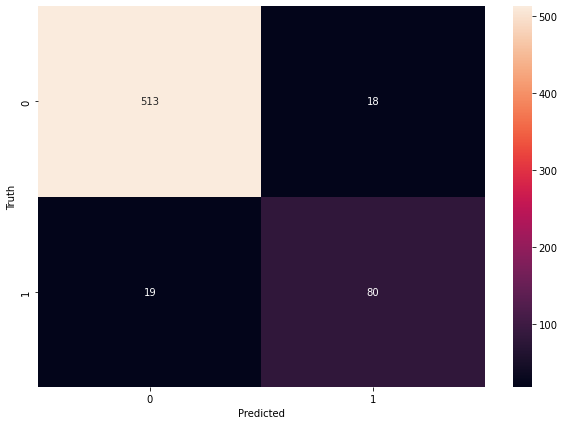

In [31]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')